# Detección y descripción de imágenes
## Fundamentos de Análisis de Imágenes

- Nombre 1: 
- Nombre 2: 
- Nombre 3: 

## Objetivos
Los objetivos de esta práctica son:
* Comprender y utilizar detectores de esquinas y manchas, y descriptores de características de OpenCV.

Tutoriales relevantes de OpenCV para profundizar más sobre el tema: https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

Las *características* de una imagen son estructuras locales y patrones que nos permiten centrarnos en regiones que contienen información relevante sobre la imagen, y nos permiten procesarla de manera más eficiente, ahorrándonos el tener que analizar todos los píxeles.

De forma general, las características de una imagen se pueden clasificar en esquinas, manchas o líneas.
En esta práctica veremos dos algoritmos de detección de esquinas, Harris y FAST; y dos algoritmos de detección de manchas, SIFT y MSER.

Todos ellos están implementados en OpenCV:
- Harris: https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
- FAST: https://docs.opencv.org/4.x/df/d74/classcv_1_1FastFeatureDetector.html
- SIFT: https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html
- MSER: https://docs.opencv.org/4.x/d3/d28/classcv_1_1MSER.html
- ORB: https://docs.opencv.org/4.x/db/d95/classcv_1_1ORB.html

Primero cargaremos una imagen de ejemplo, pero puedes usar cualquier imagen que te parezca interesante.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

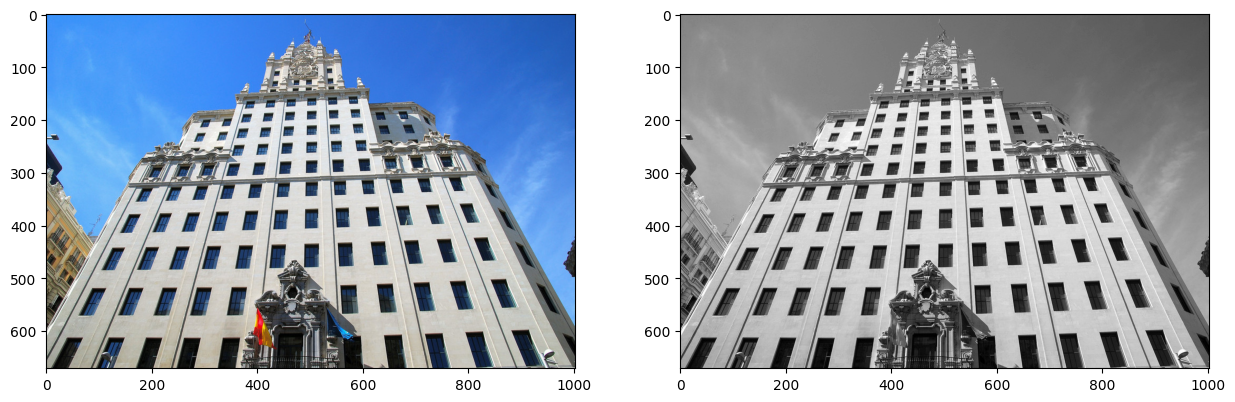

In [2]:
img_color = cv2.imread('telefonica.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
ax2.imshow(img_gray, cmap='gray')
plt.show()

**Ejercicio 1**: echa un vistazo a la documentación y tutoriales de OpenCV y usa los detectores de **Harris** y **FAST** para detectar las esquinas de la imagen. Visualiza el resultado y comprueba cómo varían el número y tipo de esquinas detectadas al cambiar los parámetros de cada algoritmo. Halla posibles diferencias entres ambos algoritmos (tiempo de ejecución, calidad de los resultados, etc.).

En el caso del detector de Harris, existen 4 argumentos en la llamada a la función ```cv2.cornerHarris```:
- ```img```: imagen de entrada (en escala de grises).
- ```blockSize```: tamaño de la vecindad de cada píxel usado para la detección de las esquinas. 
- ```ksize```: tamaño del kernel de Sobel. Un valor mayor hace que más píxeles influyan en la construcción de las esquinas.
- ```k```: parámetro libre que influye en el cálculo de la detección de esquinas correctas. Un valor mayor elimina más posibles falsos positivos.

Para pintar los resultados de la función, echa un vistazo al tutorial de OpenCV: https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html

En el caso de FAST, el uso es algo diferente debido a que está implementado como una clase:
- Primero creamos el detector con ```cv2.FastFeatureDetector_create```. Aquí podremos pasar un argumento llamado ```threshold``` que influye en el número de esquinas que se detectarán (a mayor valor, menor número de esquinas y más robustas).
- Luego usamos el detector llamando al método ```detect``` con la imagen en escala de grises.
- Por último, pintamos las esquinas detectadas con [```cv2.drawKeypoints```](https://docs.opencv.org/4.x/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920).

Harris: 0.1275461
FAST: 0.012864299999999496


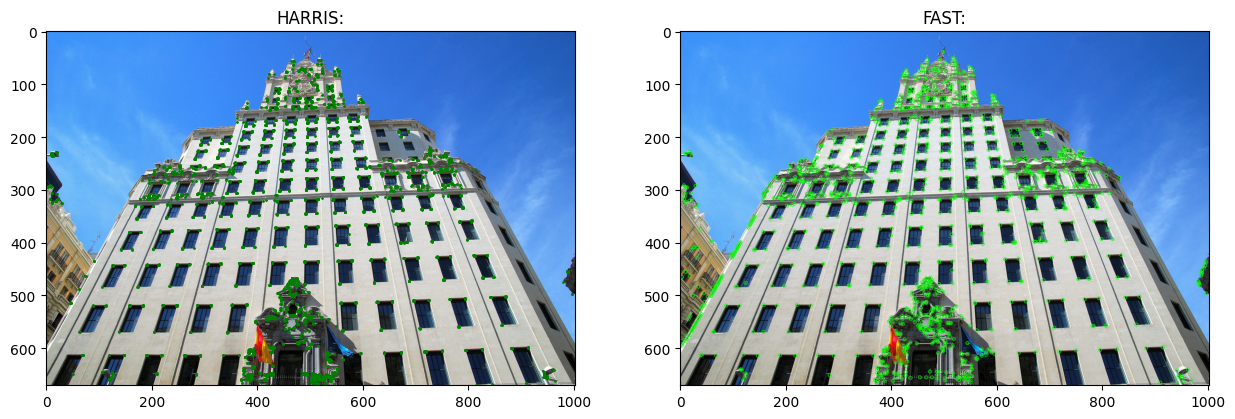

In [3]:
...

**Ejercicio 2**: esta vez vamos a detectar características de tipo "mancha" en la imagen ("blobs" en inglés). Estas son regiones que no son esquinas ni líneas, pero presentan un contraste con el fondo de la imagen. Por ejemplo, las ventanas en la imagen anterior. Comprueba cómo varían los resultados al cambiar los parámetros y compáralos.

En este ejercicio usaremos los detectores SIFT y MSER de OpenCV para la detección de manchas. Igual que FAST, están implementados como clases dentro de OpenCV y su uso es exactamente el mismo, simplemente varían los parámetros en la función para instanciar la clase:
- ```cv2.SIFT_create``` para SIFT.
- ```cv2.MSER_create``` para MSER.

Los parámetros de SIFT son los siguientes:
- ```nfeatures```: número de características por imagen. Usar el valor 0 para mantenerlas todas.
- ```nOctaveLayers```: número de capas en la pirámide.
- ```contrastThreshold```: umbral usado para descartar características poco robustas. A mayor valor, menos características pero más robustas.
- ```edgeThreshold```: umbral usado para descartar características de tipo esquina. A mayor valor, mayor número de características (opuesto al umbral anterior).
- ```sigma```: la varianza de la primera gaussiana de la pirámide.


Y los de MSER:
- ```delta```: número de niveles de gris necesarios para una característica en los que debe tener un área estable para poder ser detectada.
- ```min_area```: área mínima (en píxeles) de las características detectadas.
- ```max_area```: área máxima (en píxeles) de las características detectadas.
- ```max_variation```: umbral sobre la variación relativa de cada región a partir del cual pasa a considerarse una característica.

SIFT: 0.19506520000000016
MSER: 0.22975920000000016


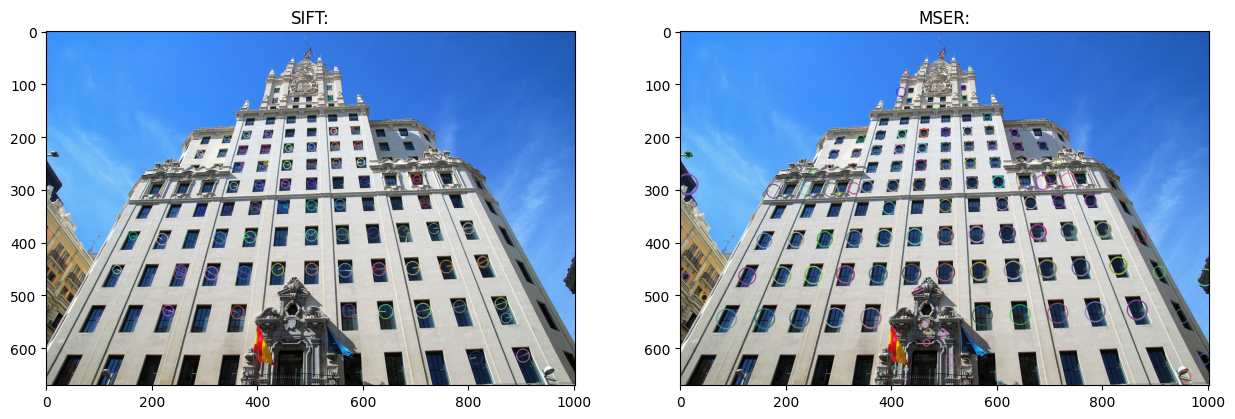

In [4]:
...

Una vez detectadas las características de la imagen, podemos generar arrays numéricos llamados **descriptores** que nos permitan identificar esas mismas características en otras imágenes. Esto es útil en muchas tareas posteriores que necesiten hacer correspondencias entre imágenes.

Idealmente, los descriptores deberían ser robustos a cambios de iluminación, transformaciones geométricas, cambios de perspectiva etc.

Los dos descriptores de características que veremos en esta práctica son SIFT y ORB. SIFT describe las características de tipo mancha que el propio algoritmo detecta, mientras que ORB parte de las esquinas detectadas por FAST o Harris.

Otra importante diferencia es que las características de SIFT son arrays de 128 números reales, mientras que los descriptores ORB son arrays de 256 valores binarios. Esto hace que los descriptores SIFT sean algo más robustos, pero los descriptores ORB son mucho más rápidos a la hora de calcular las correspondencias.

**Ejercicio 3**: partiendo de las características detectadas por SIFT en el Ejercicio 1 y por FAST en el Ejercicio 2, usa SIFT y ORB para generar los correspondientes descriptores, y comprueba qué tipo de valores contienen cada uno.

Nota: los valores binarios de los descriptores de ORB se empaquetan en 32 bytes. Se pueden desempaquetar con numpy con la función [```np.unpackbits```](https://numpy.org/doc/stable/reference/generated/numpy.unpackbits.html).

In [5]:
...

SIFT Descriptors:
Shape: (162, 128) , Type: float32 , Primer valor: 12.0 , Tiempo: 0.35695560000000004

ORB Descriptors:
Shape: (1211, 32) , Type: uint8 , Primer valor: [1 0 1 0 0 0 1 1] , Tiempo: 0.014195700000000144
